# Exploring our data and vizulization                                                                #Train and create a leanier regression model                                            #Evaluate our model                                                                                           #Make predictions                                                                                           #Calculate RMSE                                                                                                 #What if consider more/less fratures?

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
house = pd.read_csv('home_data.csv')

In [7]:
house.head() #first 5 lines

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
house.tail() # Last 5 lines

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [9]:
house.info() # house information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [10]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [11]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Text(0, 0.5, 'price of house')

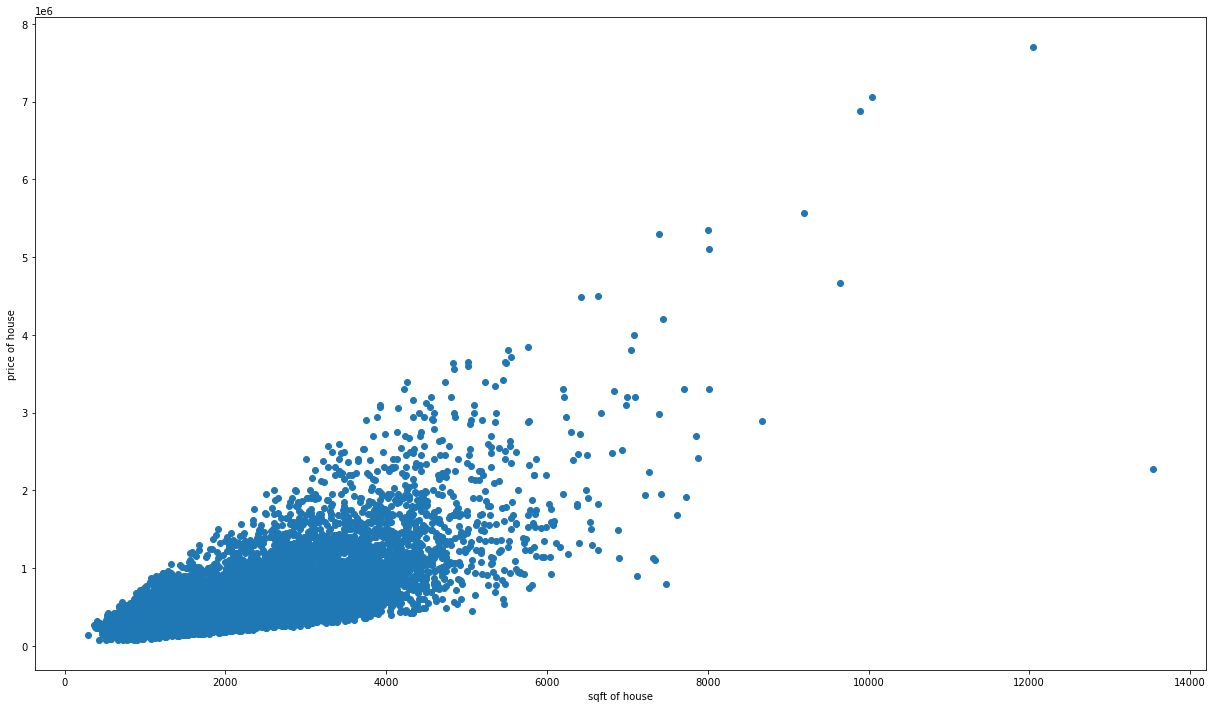

In [12]:
plt.figure(figsize=(21,12))
plt.scatter(house.sqft_living, house.price)
plt.xlabel('sqft of house')
plt.ylabel('price of house')

/home/linuxdeepa.my.lan/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


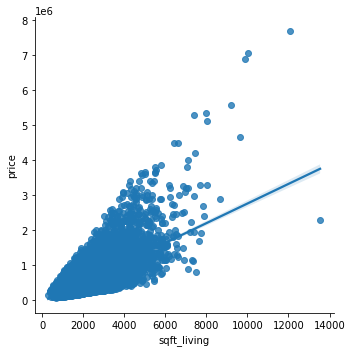

In [13]:
sns.lmplot('sqft_living', 'price', data=house)


<AxesSubplot:>

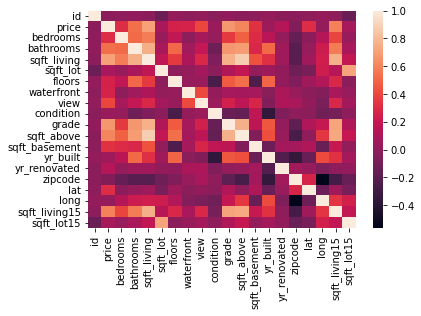

In [14]:
sns.heatmap(house.corr())

/home/linuxdeepa.my.lan/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

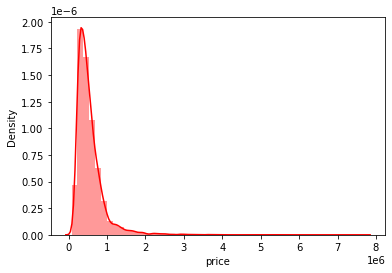

In [15]:
sns.distplot(house['price'], color='red')

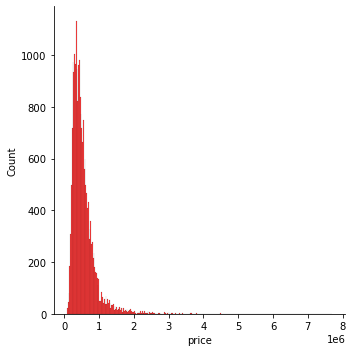

In [16]:
sns.displot(house['price'], color='red')

<AxesSubplot:xlabel='zipcode', ylabel='price'>

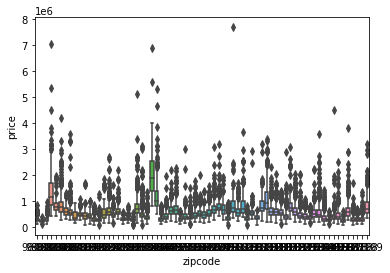

In [17]:
sns.boxplot(x='zipcode', y='price', data=house)


# Linear Regression Model:- Are we there yet? 

# Train and Test the Model

In [18]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [19]:
X = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
           'sqft_above', 'sqft_lot15', 'yr_built', 'condition', 'zipcode']]
y = house['price']

In [20]:
X.shape, y.shape

((21613, 10), (21613,))

In [21]:
#from sklearn.cross_validation import train_test_split (error)
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7 )

In [24]:
print(X_train.shape, y_train.shape)

(15129, 10) (15129,)


In [25]:
print(X_test.shape, y_test.shape)

(6484, 10) (6484,)


In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()

In [28]:
model.fit(X_train, y_train)

LinearRegression()

In [30]:
prediction = model.predict(X_test)

# Let's do some evalution

In [31]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [32]:
house1 = house[house['id'] ==6414100192]

In [33]:
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639


In [34]:
house1['price'] #Actual price

1    538000
Name: price, dtype: int64

In [35]:
prediction[1] # predited price

724004.5295811524

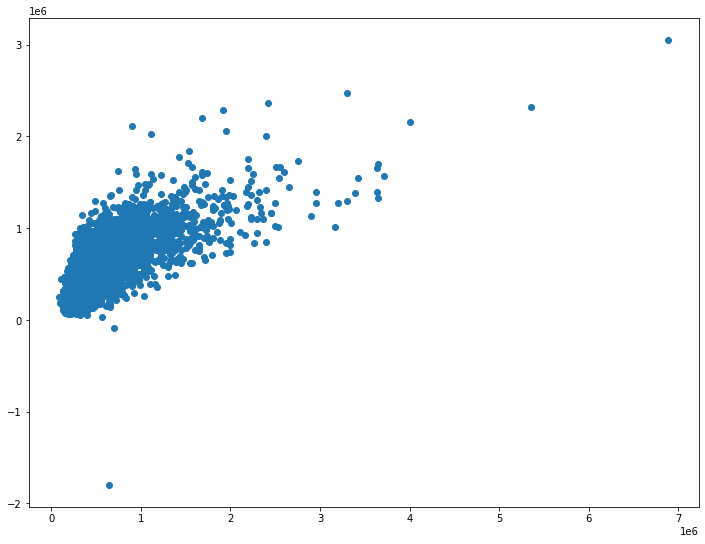

In [37]:
plt.figure(figsize = (12,9))
plt.scatter(y_test, prediction)

In [38]:
X.shape

(21613, 10)

In [39]:
model.coef_

array([-7.58573425e+04,  6.96682635e+04,  2.93038297e+02, -1.21470730e-01,
        5.53104015e+04,  1.87227471e+01, -5.14845198e-01, -3.30371439e+03,
        1.85958533e+04,  9.25438729e+01])

In [42]:
dframe_coef = pd.DataFrame(model.coef_, X.columns, columns = ['Coeffic Value'])

In [43]:
dframe_coef

,Coeffic Value
bedrooms,-75857.342535
bathrooms,69668.263453
sqft_living,293.038297
sqft_lot,-0.121471
floors,55310.401451
sqft_above,18.722747
sqft_lot15,-0.514845
yr_built,-3303.714393
condition,18595.853340
zipcode,92.543873


# RMSE (Root Mean Square Error)                                                                             # It will give Difference between the actual value and the prediction value.
# we want RMSE as low as possible. 
# the lowest RMSE is better prediction 

In [47]:
from sklearn import metrics

In [49]:
mean_sq_err = metrics.mean_squared_error(y_test, prediction)

In [50]:
RMSE = np.sqrt(mean_sq_err)

In [51]:
RMSE # using 10 features in this model

247262.4178075071

In [ ]:
#Let's build nnother model with fewer features

In [52]:
X = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built', 'zipcode']]
y = house['price']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7 )

In [54]:
model2 = LinearRegression()

In [56]:
model2.fit(X_train, y_train)

LinearRegression()

In [57]:
prediction2 = model2.predict(X_test)

In [59]:
prediction2[1]

718281.2079601847

In [60]:
prediction[1]

724004.5295811524

In [61]:
house1['price']

1    538000
Name: price, dtype: int64

In [62]:
mean_sq_err2 = metrics.mean_squared_error(y_test, prediction2)

In [63]:
RMSE2 = np.sqrt(mean_sq_err2)

In [64]:
RMSE2 # using 6 features is higher RMSE

248257.0852332532

In [65]:
RMSE #using 10 featurs is Lower RMSE, It's better

247262.4178075071

In [66]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [67]:
X = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
           'view', 'sqft_basement', 'sqft_above', 'grade', 'sqft_living15',
           'sqft_lot15', 'yr_built', 'yr_renovated', 'condition', 'zipcode']]
y = house['price']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7 )

In [69]:
model3 = LinearRegression()

In [70]:
model3.fit(X_train, y_train)

LinearRegression()

In [71]:
prediction3 = model3.predict(X_test)

In [72]:
prediction3[1]

781169.0769056883

In [73]:
prediction2[1]

718281.2079601847

In [74]:
prediction[1]

724004.5295811524

In [75]:
mean_sq_err3 = metrics.mean_squared_error(y_test, prediction3)

In [76]:
RMSE3 = np.sqrt(mean_sq_err3)

In [77]:
RMSE3

223635.3990987967

In [78]:
RMSE2

248257.0852332532

In [79]:
RMSE

247262.4178075071